# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Import Modules

In [1]:
import pickle
# Load visualization module
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import *  
# Visualizations will be shown in the notebook.
%matplotlib inline
# CSV for mapping each id to the meaning of the traffic sign. 
import csv
# Load time to monitor the time spent
import time
# I'll use OpenCV for image processing
import cv2
# My CNN would be built on TensorFlow
import tensorflow as tf
from tensorflow.contrib.layers import flatten
# Shuffle would be used to shuffle the dataset but keep the correspondance between images and their labels
from sklearn.utils import shuffle

print("Module importation done.")

Module importation done.


---
## Step 0: Load The Data

In [2]:
training_file = '../data/train.p'
validation_file='../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
train_sizes, train_coords = train['sizes'], train['coords']

X_valid, y_valid = valid['features'], valid['labels']
valid_sizes, valid_coords = valid['sizes'], valid['coords']

X_test, y_test = test['features'], test['labels']
test_sizes, test_coords = test['sizes'], test['coords']

print("Done importing images.")

Done importing images.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
# Number of training examples
assert(X_train.shape[0] == len(y_train))
n_train = X_train.shape[0]

# Number of validation examples
assert(X_valid.shape[0] == len(y_valid))
n_validation = X_valid.shape[0]

# Number of testing examples.
assert(X_test.shape[0] == len(y_test))
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape

# How many unique classes/labels there are in the dataset.
signnames_csv = 'signnames.csv'
n_classes = sum(1 for line in open(signnames_csv))-1

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape[1:])
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

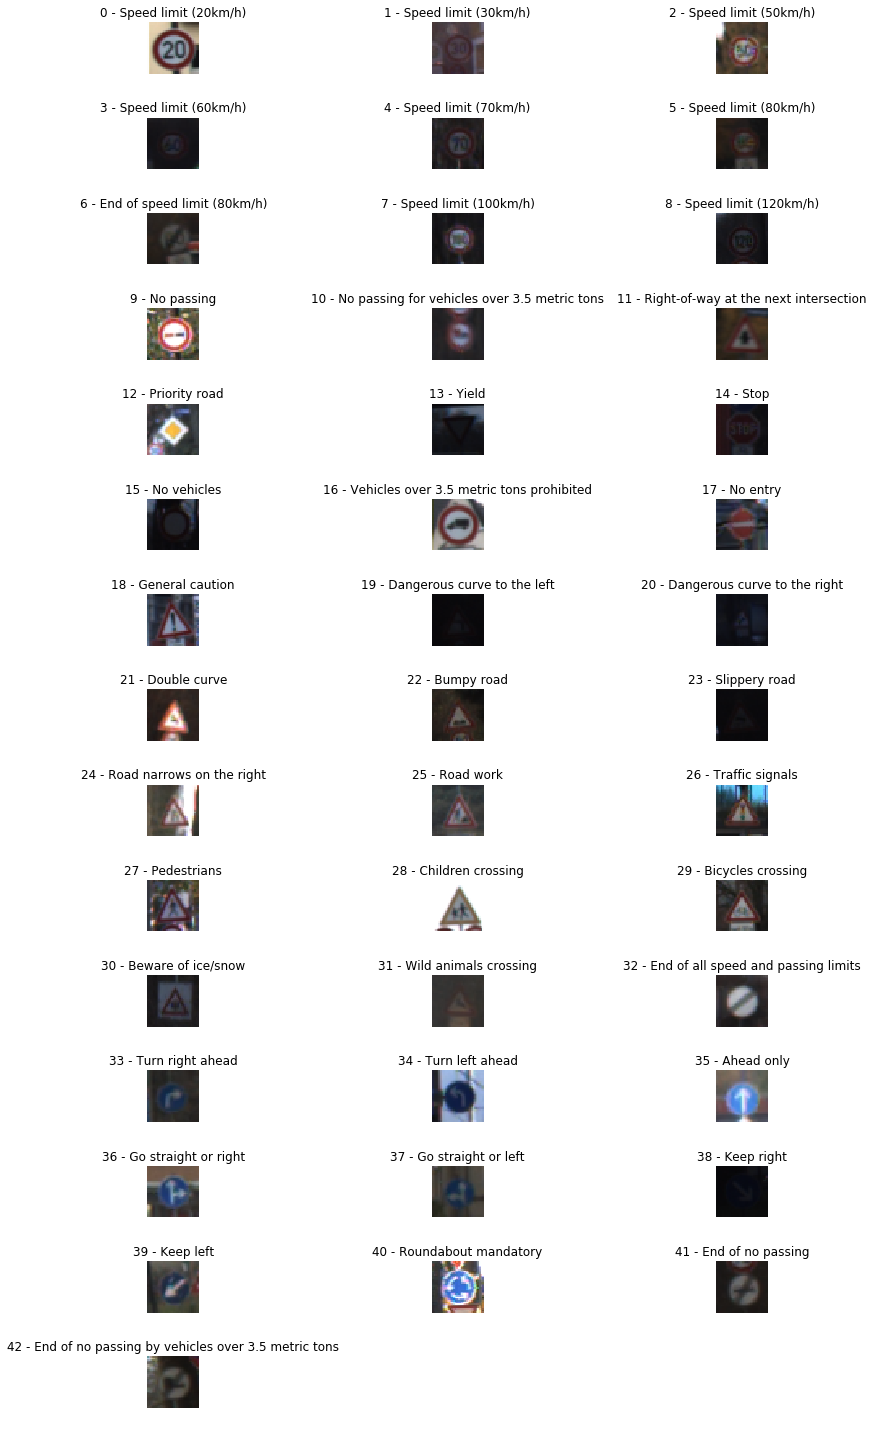

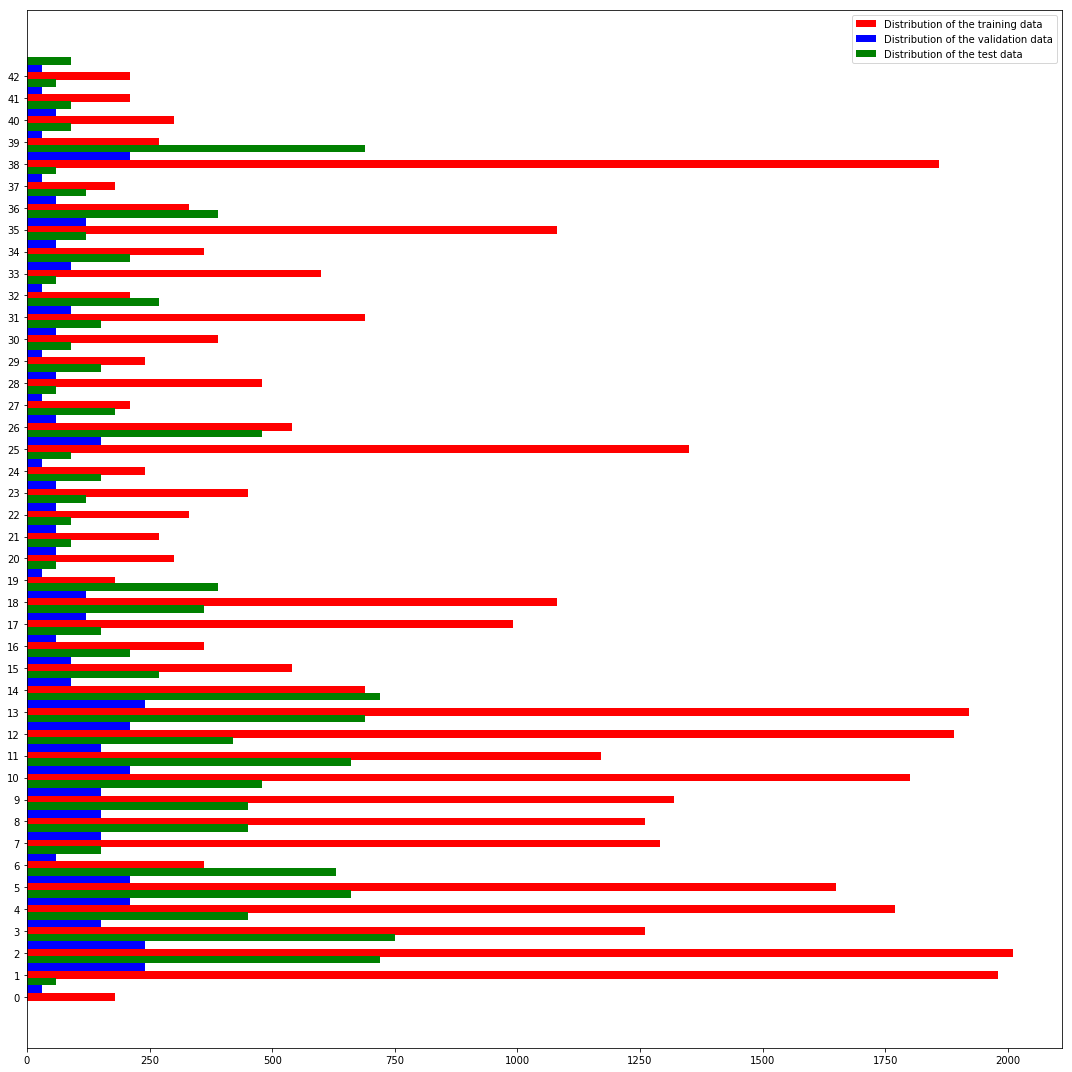

In [4]:
saved_figures_folder = "./saved_figures/"

with open(signnames_csv, 'r') as f:
    file = csv.reader(f)
    signnames_list = list(file)

#print(signnames_list[n_classes])
def showimg(subplace, title, _img):
    plt.subplot(*subplace)
    plt.axis('off')
    plt.title(title)
    plt.imshow(_img)
    plt.tight_layout()

def plotSampleAndGetDistribution(X, y, title=None, doPlot=0, it=None):
    nb_per_classes = []
    plt.figure(figsize=[12, 20])
    if (it == None):
        it = range(0, n_classes)
        height = n_classes/3+1
    else:
        height = it.shape[0]
    plot_nb = 0
    for i in it:
        image = X[y == i]
        if (doPlot):
            showimg((height, 3, plot_nb+1), signnames_list[i+1][0] + ' - ' + signnames_list[i+1][1], image[0])
            plot_nb += 1
        nb_per_classes.append(len(image))
    return nb_per_classes
    
def plotAugmentation(*argv, figsize=(20, 5), save=None):
    fig = plt.figure(figsize=figsize)
    for i in range(0, len(argv[0])):    
        ax=fig.add_subplot(1,len(argv[0]),i+1)        
        ax.imshow(argv[0][i][1])
        ax.set_title(argv[0][i][0])
    if save != None:
        savefig(saved_figures_folder+save)
    plt.show()  
    
def plotDistribution(*argv):
    Color = ['red', 'blue', 'green']
    width = 0.35
    plt.figure(figsize=[15, 15])
    for i in range(0, len(argv[0])):
        barh(arange(n_classes)+.5+i*width, argv[0][i][0], width, color=Color[i], align='center', label=argv[0][i][1])
        #description = [row[1] for row in nb_per_classes]
        yticks(arange(n_classes)+.5, arange(n_classes))
    legend()
    plt.tight_layout()
    #savefig(saved_figures_folder+"distribution.png")

# each nb_xxx holds the distribution of classes in each set
nb_train = plotSampleAndGetDistribution(X_train, y_train, 'Distribution of the training data', 1)
nb_valid = plotSampleAndGetDistribution(X_valid, y_valid, 'Distribution of the validation data')
nb_test = plotSampleAndGetDistribution(X_test, y_test, 'Distribution of the test data')

set_arg = ((nb_train, 'Distribution of the training data'), \
           (nb_valid, 'Distribution of the validation data'), \
           (nb_test, 'Distribution of the test data'))

plotDistribution(set_arg)

#print(min(nb_train))
#print(max(nb_train))      



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
def normalize_features_pos(img_):
    return (img_.astype(np.float32) - 128.) / 128.

def unnormalize(img_):
    return (img_ * 128. + 128.)
    
def rectifyCoords(nb, sizes, coords):
    rectified = []
    for j in range(0, nb):
        x_ratio = image_shape[1] / sizes[j][0]
        y_ratio = image_shape[2] / sizes[j][1]
        rectified.append((int(coords[j][0]*x_ratio), int(coords[j][1]*y_ratio), \
                          int(coords[j][2]*x_ratio), int(coords[j][3]*y_ratio)))
    return rectified

def resizeMul(img, x_mul=2, y_mul=2):     # UNUSED
    return cv2.resize(img,None,fx=x_mul, fy=y_mul, interpolation = cv2.INTER_CUBIC)

def resizeSize(img, x=32, y=32):
    return cv2.resize(img,(x, y), interpolation = cv2.INTER_CUBIC).astype(np.uint8)

def randomStretchXY(img, ROI, verbose=False):
    cpy = img.copy()
    x = 0.85 + np.random.rand()*0.3
    y = 0.85 + np.random.rand()*0.3
    rawStretched = resizeMul(cpy, x, y)
    delta_x = int(x*ROI[0]) - ROI[0]
    delta_y = int(y*ROI[1]) - ROI[1]
    adaptedROI = (ROI[0] + delta_x, ROI[1] + delta_y, ROI[2] + delta_x, ROI[3] + delta_y)
    cropped = resizeSize(crop(rawStretched, adaptedROI))
    if (verbose):
        print("X mul : {}".format(x))
        print("Y mul : {}".format(y))
        print(ROI)
        print(adaptedROI)
    return cropped, rawStretched

def crop(img, ROI):
    return img[(ROI[1]):(ROI[3]),(ROI[0]):(ROI[2])]

def someRandomImageId(nb = n_train):
    return int(np.random.rand()*nb)

def addROI(img, ROI, color=(0,255, 0)):
    copy = X_train[i].copy()
    return cv2.rectangle(copy,(ROI[0],ROI[1]),(ROI[2],ROI[3]),color)
    
def rotateImage(image, ROI, angle=None,  verbose=False):
    if angle == None:
        angle = np.random.rand()*30-15
    image_center = ((ROI[2]-ROI[0])/2+ROI[0], (ROI[3]-ROI[1])/2+ROI[1])
    rot_mat = cv2.getRotationMatrix2D(image_center,angle,1.0)
    result = cv2.warpAffine(image, rot_mat, dsize=image.shape[0:2],flags=cv2.INTER_LINEAR)
    if verbose:
        print("Rotation : {}°".format(angle))
    return result

rectified_train_coords = rectifyCoords(n_train, train_sizes, train_coords)
rectified_valid_coords = rectifyCoords(n_validation, valid_sizes, valid_coords)
rectified_test_coords  = rectifyCoords(n_test,  test_sizes,  test_coords)
cum_sum_nb_train = cumsum(nb_train)

print("Augmenting functions defined.")

Augmenting functions defined.


### ROI Cropping

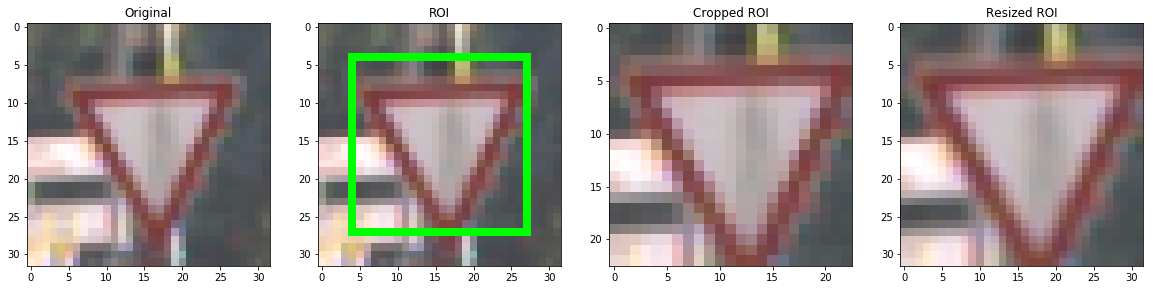

In [6]:
i = someRandomImageId()
cropped = crop(X_train[i], rectified_train_coords[i])
arguments = (('Original', X_train[i]), ('ROI', addROI(X_train[i], rectified_train_coords[i])), ('Cropped ROI', cropped), ('Resized ROI', resizeSize(cropped)))
plotAugmentation(arguments)#, save='roi.png')

### Normalize the data
Neural networks offer much better results when the data is normalized because it creates more variation in the data values. Practically speaking normalizing the data means that the input values range from -1 to 1 instead of being between 0 and 255 in the case of images. 

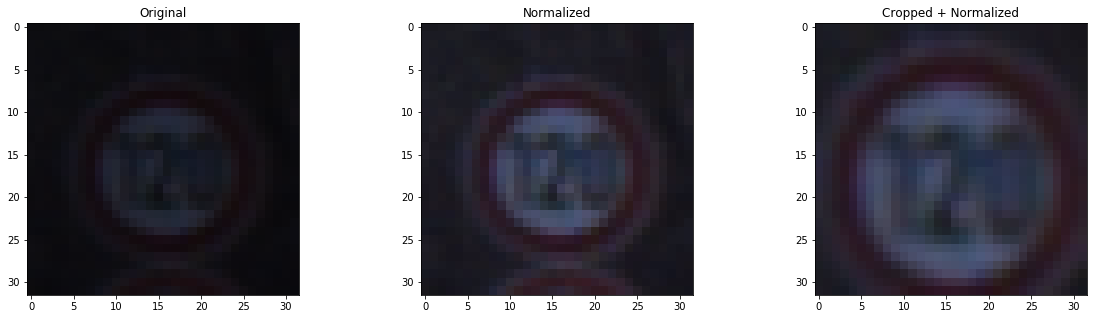

In [7]:
i = someRandomImageId()
normed = normalize_features_pos(resizeSize(crop(X_train[i], rectified_train_coords[i])))
arguments = (('Original', X_train[i]), ('Normalized', normalize_features_pos(X_train[i])), ('Cropped + Normalized', normed))
plotAugmentation(arguments)#, save = 'norm.png')

### Rotation
In order to add more training data and to make the network more accurate, I rotate randomly the images by a small angle [-15°, 15°] around the center of the Region Of Interest. It makes no sense in that case to flip the images or to rotate them more than that as the signs would never be seen by the car in these situations. 

Rotation : 10.175213669520335°


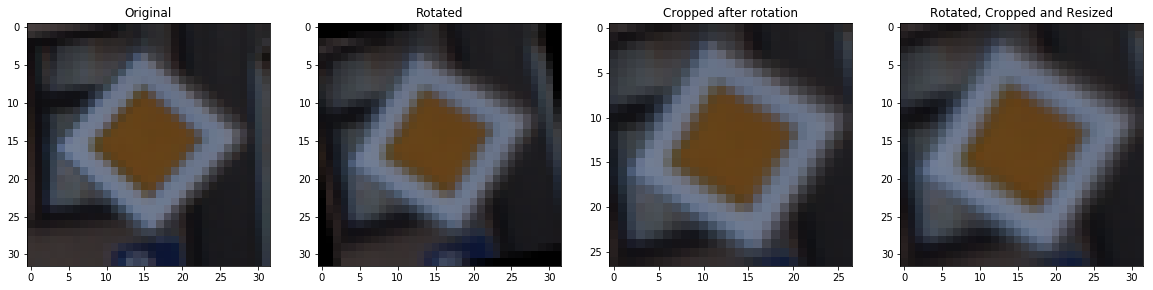

In [8]:
i = someRandomImageId()
rotated = rotateImage(X_train[i], rectified_train_coords[i], verbose=1)
cropped = crop(rotated, rectified_train_coords[i])
argument = (('Original', X_train[i]), ('Rotated', rotated), ('Cropped after rotation', cropped), ('Rotated, Cropped and Resized', resizeSize(cropped)))
plotAugmentation(argument)#, save="rotation.png")

### Stretching the image
Now, I want to slightly stretch the images in the x and y directions to take into account the fact that the car does not always face the traffic sign directly. I use this technique to augment the training set. 
The randomStretchXY() function also takes care of moving the ROI to match where the sign has moved. THe difference is not always visible on the image but the effectiveness of the method is observed. 

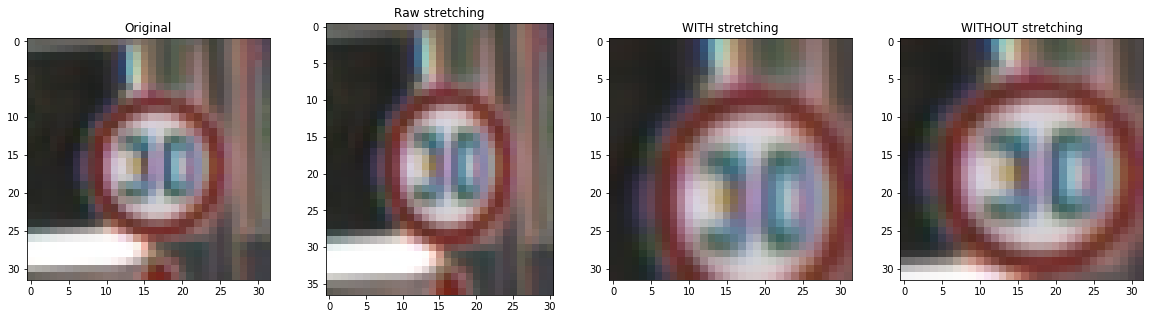

In [9]:
i = someRandomImageId()
croppedW, rawStretched = randomStretchXY(X_train[i], rectified_train_coords[i])
argument =(('Original', X_train[i]), ('Raw stretching', rawStretched), ('WITH stretching', croppedW), ('WITHOUT stretching', resizeSize(crop(X_train[i], rectified_train_coords[i]))))
plotAugmentation(argument)#, save="stretch.png")

### Augmenting Functions & Class Disparity
Here are my augmenting function "packages":
    1. Normalize + ROI
    2. Normalize + Rotate + ROI
    3. Normalize + Stretch + ROI
    
It happens that the dataset presents a big disparity in the classes distribution. There is a 10x ratio between the most represented class and the least represented one. Now that I have a few functions to augment my training dataset, I'm going to use them to lower that disparity. 
For classes where the number of elements is lower than the average number of images per classes, I'll augment

In [6]:
def augmentImageBasic(img, ROI):
    return normalize_features_pos(resizeSize(crop(img, ROI)))

def augmentImageRotate(img, ROI):
    return normalize_features_pos(resizeSize(crop(rotateImage(img, ROI), ROI)))

def augmentImageStretch(img, ROI):
    croppedW, _ = randomStretchXY(img, ROI)
    return normalize_features_pos(croppedW)

In [7]:
start_time = time.time()

X_train_augmented = np.zeros(shape=(X_train.shape))
X_valid_augmented = np.zeros(shape=(X_valid.shape))
X_test_augmented = np.zeros(shape=(X_test.shape))
#y_train_augmented = np.zeros(shape=(y_train.shape))
y_train_augmented = y_train.copy()

avg_nb_train = int(sum(nb_train)/len(nb_train))

for i in range(0, n_train):
    X_train_augmented[i] = augmentImageBasic(X_train[i], rectified_train_coords[i])
    
for j in range(0, n_validation):
    X_valid_augmented[j] = augmentImageBasic(X_valid[j], rectified_valid_coords[j])
    
for k in range(0, n_test):
    X_test_augmented[k] = normalize_features_pos(X_test[k])
        
print("Dataset augmented in {} seconds.".format(time.time() - start_time))

Dataset augmented in 9.663925886154175 seconds.


In [12]:
X_train_augmented_stretch = np.zeros(shape=(X_train.shape))
for i in range(0, n_train):
    X_train_augmented_stretch[i] = augmentImageStretch(X_train[i], rectified_train_coords[i])
print("Augmented.")

Augmented.


In [ ]:
X_train_augmented_rotate = np.zeros(shape=(X_train.shape))
for i in range(0, n_train):
    X_train_augmented_rotate[i] = augmentImageRotate(X_train[i], rectified_train_coords[i])
print("Augmented.")

In [ ]:
X_train_augmented = np.append(X_train_augmented, X_train_augmented_stretch, axis = 0)
#X_train_augmented = np.append(X_train_augmented, X_train_augmented_rotate, axis = 0)
y_train_augmented = np.append(y_train_augmented, y_train_augmented, axis = 0)

In [ ]:
augment_dataset = 1

if augment_dataset:
    min_nb_img_per_class = 2000    

    print("Size of the augmented training set : {}".format(X_train_augmented.shape[0]))

    for Class in range(0, n_classes):
        if (nb_train[Class] < min_nb_img_per_class):
            toBeAdded = min_nb_img_per_class - nb_train[Class] 
            class_label = y_train[Class]
            X_train_augmented_2 = np.zeros(shape=(toBeAdded, X_train.shape[1], X_train.shape[2], X_train.shape[3]))
            #y_train_augmented_2 = np.zeros(shape=(toBeAdded))
            while (toBeAdded > 0):
                if Class == 0:
                    i = (toBeAdded % nb_train[Class])
                else:
                    i = (toBeAdded % nb_train[Class]) + cum_sum_nb_train[Class-1] 
                #assert Class == y_train[i], "Class : {} , i : {} , y_train[i] {}".format(Class, i, y_train[i])
                #if (i%2==0):
                    #X_train_augmented_2[toBeAdded-1] = augmentImageRotate(X_train[i], rectified_train_coords[i])
                    #y_train_augmented_2[toBeAdded-1] = y_train[i]
                    #X_train_augmented = np.append(X_train_augmented, augmentImageRotate(X_train[i], rectified_train_coords[i])[np.newaxis], axis = 0) 
                #else:
                X_train_augmented_2[toBeAdded-1] = augmentImageStretch(X_train[i], rectified_train_coords[i])
                    #y_train_augmented_2[toBeAdded-1] = y_train[i]
                #X_train_augmented = np.append(X_train_augmented, augmentImageStretch(X_train[i], rectified_train_coords[i])[np.newaxis], axis = 0) 
                #augmented = augmentImageStretch(X_train[i+1], rectified_train_coords[i+1])
                #X_train_augmented = np.concatenate((X_train_augmented, [augmented]), axis=0)
                #y_train_augmented = np.concatenate((y_train_augmented, [y_train[i+1]]))
                toBeAdded -= 1
            X_train_augmented = np.concatenate((X_train_augmented, X_train_augmented_2), axis=0)
            #y_train_augmented = np.concatenate((y_train_augmented, y_train_augmented_2), axis=0)
            # Fill the labels with the according label so that each image have their according label. 
            y_train_augmented = np.append(y_train_augmented, np.full((X_train_augmented.shape[0] - y_train_augmented.shape[0]), class_label, dtype = int))
            assert(X_train_augmented.shape[0] == y_train_augmented.shape[0])
            print("Class : {} , X_train_augmented_2.shape {}".format(Class, X_train_augmented_2.shape))

    print(y_train_augmented)
    print("Size of the augmented training set : {}".format(X_train_augmented.shape[0]))

Size of the augmented training set : 35726
Class : 0 , X_train_augmented_2.shape (1820, 32, 32, 3)


### Greyscale conversion
In here is my tests to run the neural network on greyscale images instead of taking the 3 colors components.

In [ ]:
greyscale_version_enabled = 0

if greyscale_version_enabled:
    X_train_augmented = 0.299 * X_train[:, :, :, 0] + 0.587 * X_train[:, :, :, 1] + 0.114 * X_train[:, :, :, 2]
    # Scale to be between 0 and 1.
    X_train_augmented = (X_train_augmented / 255.).astype(np.float32)
    # Add the grayscale channel
    X_train_augmented = X_train_augmented.reshape(X_train_augmented.shape + (1,)) 
    X_valid_augmented = 0.299 * X_valid[:, :, :, 0] + 0.587 * X_valid[:, :, :, 1] + 0.114 * X_valid[:, :, :, 2]
    X_valid_augmented = (X_valid_augmented / 255.).astype(np.float32)
    X_valid_augmented = X_valid_augmented.reshape(X_valid_augmented.shape + (1,)) 
    print(X_train_augmented.shape)
    print("Greyscale version.")
else:
    print("Color version.")

### Save to pickle file
I save my augmented training dataset to avoid having to recompute it each time as it takes quite some time.

In [ ]:
#with open("../data/X_train_augmented.p", "wb") as X_output_file:
#    pickle.dump(X_train_augmented, X_output_file)
    #pickle.dump(test, X_output_file)
    
#with open("../data/X_train_augmented.p", mode='rb') as X_output_file:
#    test_loaded = pickle.load(X_output_file)
    
#print(test_loaded)
    
#with open(r"../data/y_train_augmented.p", "wb") as y_output_file:
#    pickle.dump(y_train_augmented, y_output_file)

In [ ]:
fig = plt.figure(figsize=(20, 10))

i = someRandomImageId()
ax=fig.add_subplot(2,4,1)    
ax.imshow(X_train[i])
ax.set_title('Original')
ax=fig.add_subplot(2,4,2)  
resized = cv2.resize(X_train_augmented_2[i], (32, 32))
ax.imshow(resized, cmap='gray')
ax.set_title('Augmented "Basic"')

ax=fig.add_subplot(2,4,3)    
i = someRandomImageId()
ax.imshow(X_train[i])
ax=fig.add_subplot(2,4,4)    
ax.imshow(X_train_augmented[i])

i = someRandomImageId()
ax=fig.add_subplot(2,4,5)    
ax.imshow(X_train[i])
ax=fig.add_subplot(2,4,6)    
ax.imshow(X_train_augmented[i])

i = someRandomImageId()
ax=fig.add_subplot(2,4,7)    
ax.imshow(X_train[i])
ax=fig.add_subplot(2,4,8)    
ax.imshow(X_train_augmented[i])
plt.show() 

### Model Architecture

In [8]:
EPOCHS = 20
BATCH_SIZE = 128

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1
dropout = 0.50               #Dropout is the probability to keep the parameter -> avoid overfitting

input_depth = 3

# Store layers weight & bias
weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape=(5, 5, input_depth, 6), mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal(shape=([5, 5, 6, 16]), mean = mu, stddev = sigma)),
    'wfc1': tf.Variable(tf.truncated_normal(shape=([400, 120]), mean =  mu, stddev = sigma)),
    'wfc2': tf.Variable(tf.truncated_normal(shape=([120, 84]), mean =  mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal(shape=([84, n_classes]), mean =  mu, stddev = sigma))}

biases = {
    'bc1': tf.Variable(tf.zeros([6])),
    'bc2': tf.Variable(tf.zeros([16])),
    'bfc1': tf.Variable(tf.zeros([120])),
    'bfc2': tf.Variable(tf.zeros([84])),
    'out': tf.Variable(tf.zeros([n_classes]))}

tf.summary.histogram('wc1', weights['wc1'])
tf.summary.histogram('wc2', weights['wc2'])
tf.summary.histogram('wfc1', weights['wfc1'])
tf.summary.histogram('wfc2', weights['wfc2'])
tf.summary.histogram('out', weights['out'])

embedding_input = None
embedding_size = None

def LeNet(x, drop_out_):      
    with tf.name_scope("First_Conv_Layer"):
        #################################################################
        # Layer 1: Convolutional. Input = 32x32x3|1. Output = 28x28x6.
        #################################################################

        # Apply Convolution
        conv_layer_1 = tf.nn.conv2d(x, weights['wc1'], strides=[1, 1, 1, 1], padding='VALID')
        # Add bias
        conv_layer_1 = tf.nn.bias_add(conv_layer_1, biases['bc1'])
    
        ###################
        # Activation.
        ###################

        relu_layer = tf.nn.relu(conv_layer_1)

        ##########
        # Dropout.
        ##########

        #drop_out = tf.nn.dropout(relu_layer, drop_out_)

        ##################################################
        # Pooling. Input = 28x28x6. Output = 14x14x6.
        ##################################################

        filter_shape = [1, 2, 2, 1]
        strides = [1, 2, 2, 1]
        pool_1 = tf.nn.max_pool(relu_layer, filter_shape, strides, padding='VALID')
    
    with tf.name_scope("Second_Conv_Layer"):
        #################################################
        # Layer 2: Convolutional. Output = 10x10x16.
        #################################################

        # Apply Convolution
        conv_layer_2 = tf.nn.conv2d(pool_1, weights['wc2'], strides=[1, 1, 1, 1], padding='VALID')
        # Add bias
        conv_layer_2 = tf.nn.bias_add(conv_layer_2, biases['bc2'])

        ###################
        # Activation.
        ###################

        relu_layer_2 = tf.nn.relu(conv_layer_2)

        ##########
        # Dropout.
        ##########

        #drop_out_2 = tf.nn.dropout(relu_layer_2, drop_out_)

        #################################################
        # Pooling. Input = 10x10x16. Output = 5x5x16.
        #################################################

        filter_shape = [1, 2, 2, 1]
        strides = [1, 2, 2, 1]
        pool_2 = tf.nn.max_pool(relu_layer_2, filter_shape, strides, padding='VALID')

        ##############################################
        # Flatten. Input = 5x5x16. Output = 400.
        ##############################################

        flat = tf.contrib.layers.flatten(pool_2)
    
    with tf.name_scope("First_Fully_Con_Layer"):
        ############################################################
        # Layer 3: Fully Connected. Input = 400. Output = 120.
        ############################################################

        fully_con_1 = tf.matmul(flat, weights['wfc1']) + biases['bfc1']

        ##################
        # Activation.
        ##################

        relu_layer_3 = tf.nn.relu(fully_con_1)

        ##########
        # Dropout.
        ##########

        drop_out_3 = tf.nn.dropout(relu_layer_3, drop_out_)

    with tf.name_scope("Second_Fully_Con_Layer"):
        ###########################################################
        # Layer 4: Fully Connected. Input = 120. Output = 84.
        ###########################################################

        fully_con_2 = tf.matmul(drop_out_3, weights['wfc2']) + biases['bfc2']

        ##################
        # Activation.
        ##################

        relu_layer_4 = tf.nn.relu(fully_con_2)

        ##########
        # Dropout.
        ##########

        drop_out_4 = tf.nn.dropout(relu_layer_4, drop_out_)

    with tf.name_scope("FullyCon_Output_Layer"):
        ##########################################################
        # Layer 5: Fully Connected. Input = 84. Output = 43.
        ##########################################################

        #embedding_input = drop_out_4
        #embedding_size = 84
        #assignment = embedding.assign(embedding_input)
        logits = tf.matmul(drop_out_4, weights['out']) + biases['out']
    
        return logits

print("Model defined.")

Model defined.


## Features and Labels

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.
`keep_prob` is a placeholder for the probability to keep a unit and its connections.

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, input_depth))
y = tf.placeholder(tf.int64, (None))
one_hot_y = tf.one_hot(y, n_classes)

keep_prob = tf.placeholder(tf.float32)

## Training Pipeline

I do not need to reduce the learning rate because the `AdamOptimizer()` is taking care of that. ADAM updates every parameter in the network with an individual learning rate.

Each parameter specific learning rate is computed using the learning_rate initialy given as the upper limit. This means that every single learning rate can vary from 0 (no update) to learning_rate (maximum update).

The learning rates adapt themselves during train steps. It can help to reduce loss during the latest step of training, when the computed loss with the previously associated lambda parameter has stopped to decrease.

In [10]:
rate = 0.0005

logits = LeNet(x, keep_prob)
with tf.name_scope("cost"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)

    tf.summary.scalar("cost", cross_entropy)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [11]:
with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar("accuracy", accuracy_operation)
    
saver = tf.train.Saver()

def evaluate(sess, X_data, y_data, dropout_):
    num_examples = X_data.shape[0]
    total_accuracy = 0.
    total_loss = 0
    #sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: dropout_})
        total_accuracy += (accuracy * batch_x.shape[0])
        total_loss += (loss * batch_x.shape[0])
    return total_accuracy / num_examples, total_loss / num_examples

print("Evaluate function defined.")

Evaluate function defined.


## Train the Model
I feed the training data into the training pipeline to learn the weights of the model.

Before each epoch, I shuffle the training set to have a random batch of training images. This is necessary to avoid having an update of the weights biased by an over-represented class of input. 

After each epoch, I measure the loss and accuracy of the validation set. 

Finally, I save the model.

In [12]:
validation_accuracy = []
validation_loss = []
training_accuracy = []
training_loss = []

with tf.Session() as sess:
    #writer = tf.summary.FileWriter("./logs/nn_logs", sess.graph)
    #merged = tf.summary.merge_all()
    
    summ = tf.summary.merge_all()

    #intiialize embedding matrix as 0s
    embedding = tf.Variable(tf.zeros([1024, 84]), name="test_embedding")
    #give it calculated embedding
    #assignment = embedding.assign(embedding_input)
    assignment = None
    #initialize the saver
    # Add ops to save and restore all the variables.
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    #filewriter is how we write the summary protocol buffers to disk
    LOGDIR = "./logs/nn_logs"
    writer = tf.summary.FileWriter(LOGDIR)
    writer.add_graph(sess.graph)

    ## Format: tensorflow/contrib/tensorboard/plugins/projector/projector_config.proto
    config = tf.contrib.tensorboard.plugins.projector.ProjectorConfig()
    ## You can add multiple embeddings. Here we add only one.
    embedding_config = config.embeddings.add()
    embedding_config.tensor_name = embedding.name
    embedding_config.sprite.image_path = LOGDIR + 'sprite_1024.png'
    embedding_config.metadata_path = LOGDIR + 'labels_1024.tsv'
    # Specify the width and height of a single thumbnail.
    embedding_config.sprite.single_image_dim.extend([28, 28])
    tf.contrib.tensorboard.plugins.projector.visualize_embeddings(writer, config)
    
    sess.run(tf.global_variables_initializer())
    print("Training...")
    print("Number of epochs : {}".format(EPOCHS))
    print("Batch size : {}".format(BATCH_SIZE))
    print("Learning rate : {}".format(rate))
    print("Dropout : {}".format(dropout))
    print()
    for i in range(EPOCHS):
        #X_train, y_train = shuffle(X_train, y_train)
        X_train_augmented, y_train_augmented = shuffle(X_train_augmented, y_train_augmented)
        for offset in range(0, n_train, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_augmented[offset:end], y_train_augmented[offset:end]
            #batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
        
        print("EPOCH {} ...".format(i+1))
            # Training data
        training_accuracy_, training_loss_ = evaluate(sess, X_train_augmented, y_train_augmented, 1.)
        training_accuracy.append(training_accuracy_)
        training_loss.append(training_loss_)
        print("Training Accuracy = {:.5f}".format(training_accuracy_))
        print("Training Loss = {:.5f}".format(training_loss_))
            # Validation data
        validation_accuracy_, validation_loss_ = evaluate(sess, X_valid_augmented, y_valid, 1.)
        validation_accuracy.append(validation_accuracy_)
        validation_loss.append(validation_loss_)
        print("Validation Accuracy = {:.5f}".format(validation_accuracy_))
        print("Validation Loss = {:.5f}".format(validation_loss_))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...
Number of epochs : 20
Batch size : 128
Learning rate : 0.0005
Dropout : 0.5

EPOCH 1 ...
Training Accuracy = 0.60332
Training Loss = 1.54075
Validation Accuracy = 0.54785
Validation Loss = 1.71045

EPOCH 2 ...
Training Accuracy = 0.83910
Training Loss = 0.66179
Validation Accuracy = 0.79955
Validation Loss = 0.79972

EPOCH 3 ...
Training Accuracy = 0.91020
Training Loss = 0.40854
Validation Accuracy = 0.86100
Validation Loss = 0.55123

EPOCH 4 ...
Training Accuracy = 0.93129
Training Loss = 0.28768
Validation Accuracy = 0.88594
Validation Loss = 0.43285

EPOCH 5 ...
Training Accuracy = 0.95149
Training Loss = 0.22804
Validation Accuracy = 0.90249
Validation Loss = 0.38167

EPOCH 6 ...
Training Accuracy = 0.95552
Training Loss = 0.18339
Validation Accuracy = 0.91610
Validation Loss = 0.31811

EPOCH 7 ...
Training Accuracy = 0.96261
Training Loss = 0.15014
Validation Accuracy = 0.92313
Validation Loss = 0.30020

EPOCH 8 ...
Training Accuracy = 0.96908
Training Loss = 0.12975


## Accuracy and Loss visualization
I want to visualize the decrease in loss and the increase in accuracy for the training and validation set.

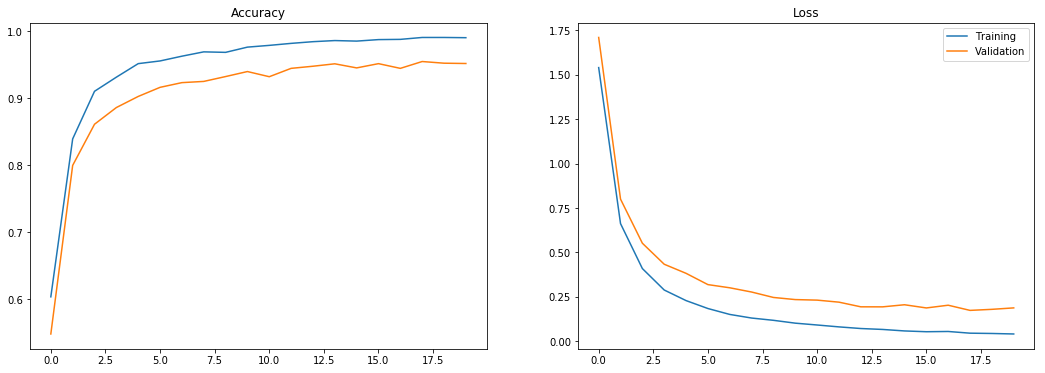

In [13]:
def plot_curve(ax, data, label):
    x = len(data)
    y = np.arange(x)
    ax.plot(y, data, label=label)
    
fig = plt.figure(figsize=(18, 6))
ax=fig.add_subplot(1,2,1)
plot_curve(ax, training_accuracy, "Training")
plot_curve(ax, validation_accuracy, "Validation")
ax.set_title('Accuracy')
ax=fig.add_subplot(1,2,2) 
plot_curve(ax, training_loss, "Training")
plot_curve(ax, validation_loss, "Validation")
ax.set_title('Loss')
legend()
savefig(saved_figures_folder+"lossAccuracy.png")

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

### Test the model 
Once I was happy with my validation accuracy, I performed the final test on the test data. 

In [14]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './lenet')
    
    test_accuracy, test_loss = evaluate(sess, X_test_augmented, y_test, 1.)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.694


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

I got these images from https://github.com/navoshta. Thanks a lot by the way !

### Load and Output the Images

/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

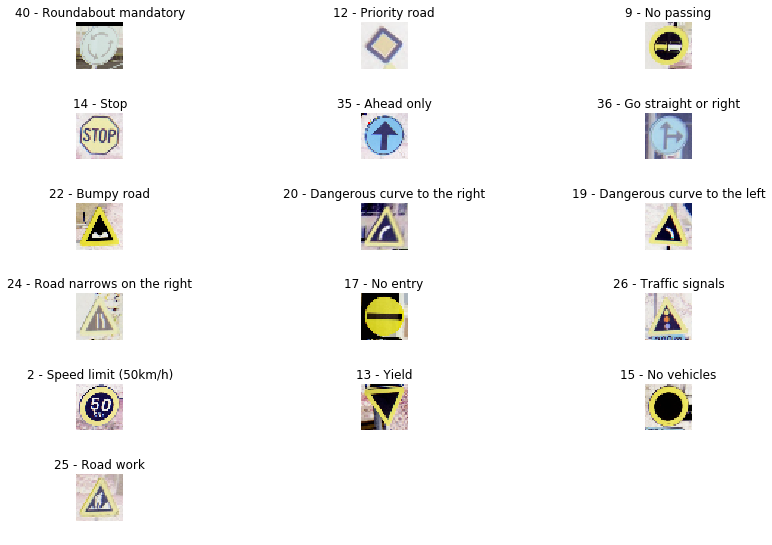

In [42]:
from PIL import Image
import glob 

new_images = np.empty([0, 32, 32, 3], dtype = np.float32)
for filename in glob.glob('new_images/*.ppm'):
    image = Image.open(filename)
    new_image = resizeSize(cv2.imread(filename))[np.newaxis]
    new_images = np.append(new_images, new_image, axis=0)

# Png labels
labels = np.array([21, 39, 17, 40, 17, 38, 13, 28, 28, 24,0])
# Ppm labels 
labels = np.array([40, 12, 9, 14, 35, 36, 22, 20, 19, 24, 17, 26, 2, 13, 15, 25])
nb_new_images = new_images.shape[0]
assert(labels.shape[0] == new_images.shape[0])

plotSampleAndGetDistribution(new_images, labels, doPlot=1, it=labels)

### Preprocess the Data and Predict the Sign Type for Each Image

/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

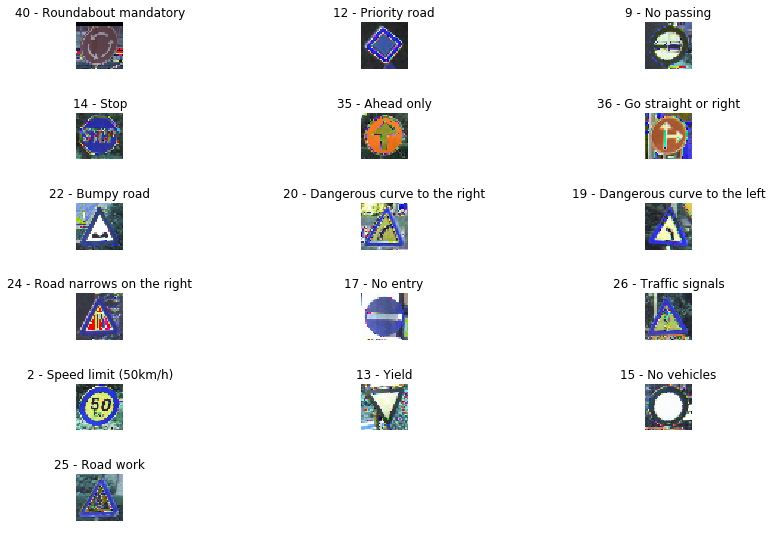

In [43]:
new_images_augmented = np.zeros(shape=(new_images.shape))

for i in range(nb_new_images):
    new_images_augmented[i] = normalize_features_pos(new_images[i])

plotSampleAndGetDistribution(new_images_augmented, labels, doPlot=1, it=labels)
#plotSampleAndGetDistribution(unnormalize(new_images_augmented), labels, doPlot=1, it=labels)


### Analyze Performance

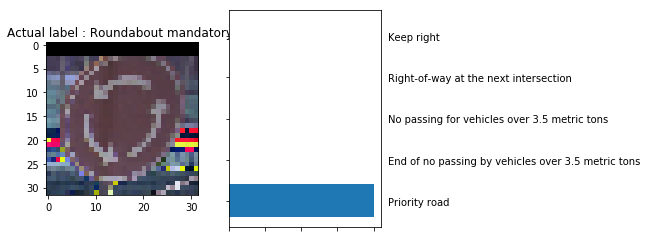

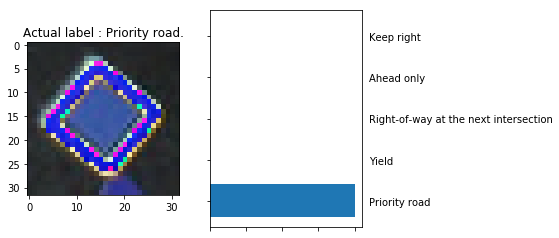

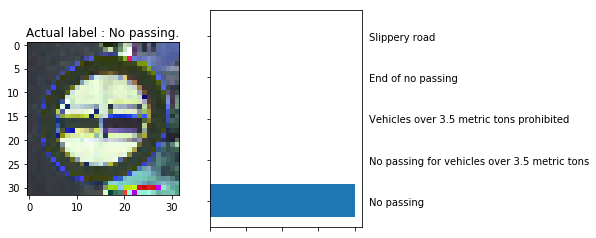

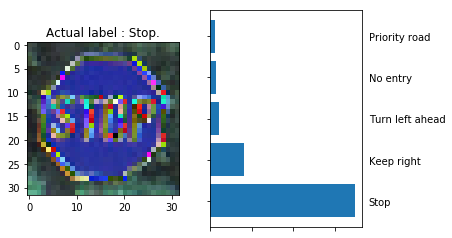

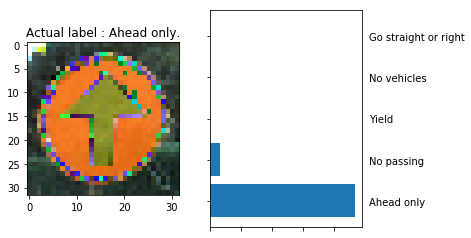

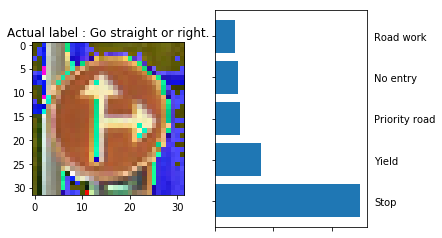

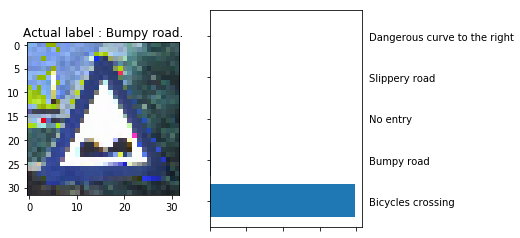

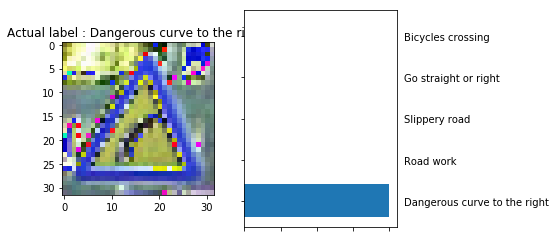

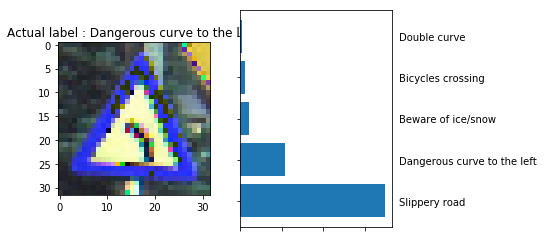

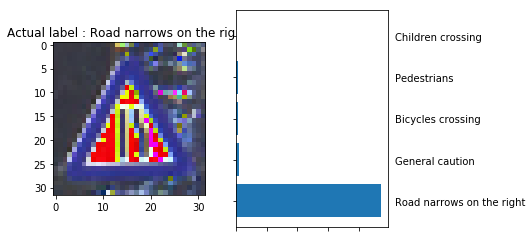

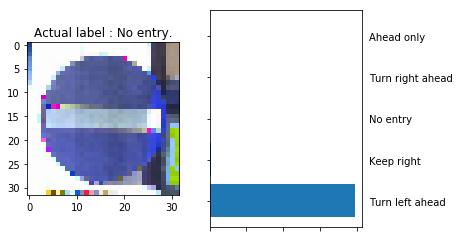

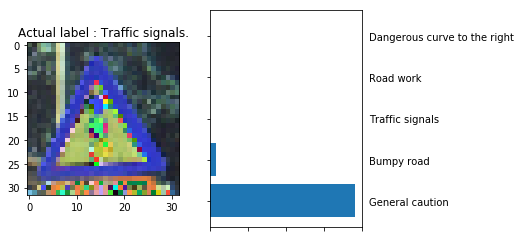

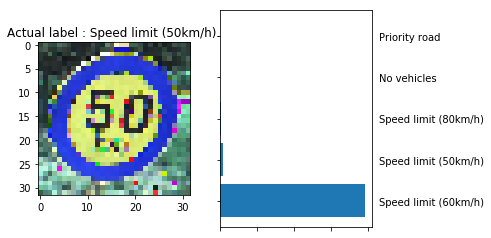

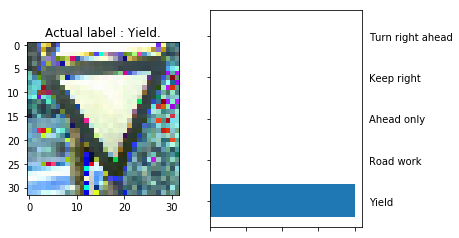

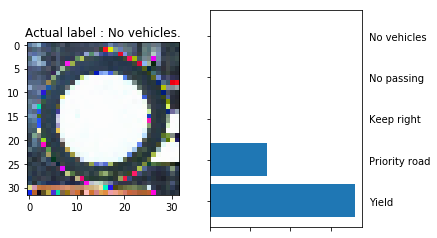

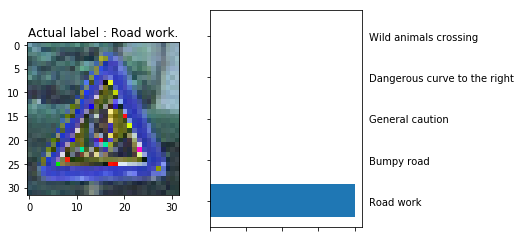

In [44]:
x = tf.placeholder(tf.float32, shape = (None, new_images.shape[1], new_images.shape[2], new_images.shape[3]))

def get_top_k_softmax_prob(img, label=None, k=5):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        #saver.restore(sess, './lenet')

        logits = LeNet(x, keep_prob)
        prediction = tf.nn.softmax(logits=logits)
        top_k_predictions = tf.nn.top_k(prediction, k)
        return sess.run([top_k_predictions], feed_dict = {x : img, keep_prob: 1.})

(top_k_softmax_prob, top_k_labels) = get_top_k_softmax_prob(new_images_augmented)[0]
signnames_list = np.asarray(signnames_list)

#print("top_k_softmax_prob : {}".format(top_k_softmax_prob))
#print("top_k_labels : {}".format(top_k_labels))

for i in range(nb_new_images):
    fig = plt.figure(figsize=(6, 4))
    ax=fig.add_subplot(1,2,1)
    ax.imshow(new_images_augmented[i])
    ax.set_title('Actual label : {}.'.format(signnames_list[labels[i]+1][1]))
    ax=fig.add_subplot(1,2,2)
    ax.barh(np.arange(5)+.5, top_k_softmax_prob[i], align='center')
    yticks(np.arange(5)+.5, list(signnames_list[top_k_labels[i]+1,1]))#signnames_list[top_k_softmax_prob[1][i][0]][1])
    ax.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='off')
    savefig(saved_figures_folder+"test_image_pred_" + str(i) + ".png")

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")